In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.datasets
import pandas as pd
import matplotlib.pyplot as plt

# Logisitic Regression

Logistic Regression is used for binary classification.

## Example #1 - Wine Dataset

From "Linear Classifiers in Python" DataCamp course. Part 1: Applying logisitic regression and SVM. Video: Applying logisitic regression and SVM.

### Fit the Model

In [60]:
wine = sklearn.datasets.load_wine()
X, y = wine.data, wine.target
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model Evaluation

In [61]:
print(lr.score(X, y))
print(lr.predict_proba(wine.data[:1]))

0.9719101123595506
[[9.95108705e-01 4.35738160e-03 5.33913449e-04]]


### ROC Curve

In [63]:
cancer = sklearn.datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

In [64]:
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Text(0,0.5,'True Positive Rate')

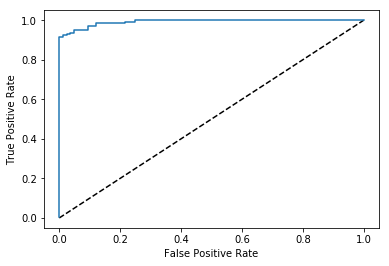

In [71]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### AUC (Area under the ROC curve)

The larger area under the ROC curve, the better the model.

In [72]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.9919808201058201

### AUC using cross-validation:

In [73]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')
print(cv_scores)

[0.99386305 0.99192506 0.99731724 0.98256204 0.99664655]
